# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras import optimizers

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


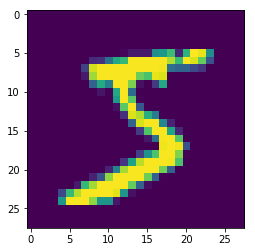

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**First Model** - with following specifications

1. No Batch Normalizations
2. No Max Pooling
3. No Drop outs
4. No Change in Learning rate
5. Number of parameters is very high (144K)

This is not at all an ideal model as per the structure. The target network should have less than 15K parameters and accuracy of 99.4% on validation dataset.

In [10]:
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3)) #Receptive field 7*7
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3)) #Receptive field 9*9
model.add(Activation('relu'))
model.add(Convolution2D(10, 20))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0819 01:43:19.389158 139867541325696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0819 01:43:19.404560 139867541325696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 01:43:19.407217 139867541325696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
activation_3 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 32)        9248      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0819 01:43:19.489359 139867541325696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 01:43:19.517405 139867541325696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0819 01:43:19.621427 139867541325696 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0819 01:43:19.778202 139867541325696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.1212 - acc: 0.9637 - val_loss: 0.0499 - val_acc: 0.9836
Epoch 2/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0454 - acc: 0.9862 - val_loss: 0.0370 - val_acc: 0.9882
Epoch 3/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0304 - acc: 0.9908 - val_loss: 0.0390 - val_acc: 0.9878
Epoch 4/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0220 - acc: 0.9929 - val_loss: 0.0513 - val_acc: 0.9868
Epoch 5/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0164 - acc: 0.9949 - val_loss: 0.0446 - val_acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0125 - acc: 0.9960 - val_loss: 0.0369 - val_acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.0092 - acc: 0.9969 - val_loss: 0.0506 

As we can see above, the validation accuracy is 99.82% (highest) and Training accuracy is 98.93% (Highest). The difference in accuracies suggest overfitting. Given these accuracies, it is not possible to improve the training and val accuracies to the desired level.

Following 2 changes are suggested in the next network

1. Add Maxpool to reduce the number of parameters - while adding maxpool, we look at the image and assume that the receptive field of 5*5 should be sufficient to generate the required curves for prediction. Hence maxpool to be added after every 2 convolutions.
2. Add 1*1 convolution - again to reduce the number of parameters.

These two changes will also help in reducing the gap between Train and Val accuracies.

**Second Model**

In [13]:
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(Activation('relu'))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(32, 3, 3)) #Receptive field 10*10
model.add(Activation('relu'))
model.add(MaxPooling2D()) #Receptive field 11*11
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  
W0819 01:44:57.579934 139867541325696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
activation_8 (Activation)    (None, 10, 10, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':


In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.1706 - acc: 0.9499 - val_loss: 0.0603 - val_acc: 0.9796
Epoch 2/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0634 - acc: 0.9804 - val_loss: 0.0494 - val_acc: 0.9841
Epoch 3/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0507 - acc: 0.9843 - val_loss: 0.0424 - val_acc: 0.9856
Epoch 4/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0414 - acc: 0.9874 - val_loss: 0.0343 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0359 - acc: 0.9888 - val_loss: 0.0392 - val_acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0316 - acc: 0.9897 - val_loss: 0.0386 - val_acc: 0.9870
Epoch 7/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0280 - acc: 0.9910 - val_loss: 0.0371 -

In the above model, following 2 has been achieved. 

1. The number of parameters have reduced and it is now 9K. 
2. The difference between the Training and Testing accuracy has improved compared to last time. Training accuracy is at 99.32% (Highest) and Val accuracy is 98.91% (Highest). But this is not sufficient and we need to find ways to improve it further.

Also, note that the training is slower and more consistent after removing the dense layer.

In the next model, following 2 changes are suggested

1. Batch normalization helps in converging faster, we add batch normalization in our next model to improve the train and val accuracies.

2. Increase the number of epochs to 30 for more learning and more consistent accuracy on Val set.

**Third Model**

In [15]:
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(32, 3, 3)) #Receptive field 10*10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D()) #Receptive field 11*11
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0819 01:46:29.508894 139867541325696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_11 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
__________

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 15s 253us/step - loss: 0.3844 - acc: 0.9379 - val_loss: 0.1136 - val_acc: 0.9851
Epoch 2/30
60000/60000 [==============================] - 14s 234us/step - loss: 0.1588 - acc: 0.9687 - val_loss: 0.0690 - val_acc: 0.9879
Epoch 3/30
60000/60000 [==============================] - 14s 234us/step - loss: 0.1106 - acc: 0.9755 - val_loss: 0.0520 - val_acc: 0.9888
Epoch 4/30
60000/60000 [==============================] - 14s 231us/step - loss: 0.0904 - acc: 0.9789 - val_loss: 0.0425 - val_acc: 0.9906
Epoch 5/30
60000/60000 [==============================] - 14s 230us/step - loss: 0.0718 - acc: 0.9827 - val_loss: 0.0416 - val_acc: 0.9893
Epoch 6/30
60000/60000 [==============================] - 14s 228us/step - loss: 0.0652 - acc: 0.9837 - val_loss: 0.0391 - val_acc: 0.9899
Epoch 7/30
60000/60000 [==============================] - 14s 230us/step - loss: 0.0564 - acc: 0.9857 - val_loss: 0.

Training accuracy 99.54% (highest) and testing accuracy of 99.23% (Highest) has been achieved with the suggested model with 30 epochs. But the testing accuracies fluctuates between different values. This is not a sign of good learning by the model. The val accuracy fluctuations should not be so high in a good model.

The further improvement can be achieved either by changing the learning rate in such a way that the learning improves consistently or increasing the epochs.

In the forth model, learning rate is modified to improve learning. For this learning rate of 0.01 is added with a decay of 0.001. These learning rates are decided after few experiments.

**Forth Model**

In [17]:
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #Receptive field 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(16, 3, 3)) #Receptive field 5*5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D()) #Receptive field 6*6
model.add(Convolution2D(32, 3, 3)) #Receptive field 10*10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D()) #Receptive field 11*11
model.add(Convolution2D(10, 1))
model.add(Convolution2D(10, 5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_14 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_15 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr = 0.01, decay = 0.0001),
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 16s 259us/step - loss: 0.1837 - acc: 0.9573 - val_loss: 0.0643 - val_acc: 0.9815
Epoch 2/30
60000/60000 [==============================] - 14s 240us/step - loss: 0.0815 - acc: 0.9775 - val_loss: 0.0362 - val_acc: 0.9882
Epoch 3/30
60000/60000 [==============================] - 14s 240us/step - loss: 0.0569 - acc: 0.9841 - val_loss: 0.0404 - val_acc: 0.9875
Epoch 4/30
60000/60000 [==============================] - 14s 241us/step - loss: 0.0492 - acc: 0.9861 - val_loss: 0.0268 - val_acc: 0.9922
Epoch 5/30
60000/60000 [==============================] - 14s 240us/step - loss: 0.0414 - acc: 0.9881 - val_loss: 0.0328 - val_acc: 0.9905
Epoch 6/30
60000/60000 [==============================] - 15s 245us/step - loss: 0.0351 - acc: 0.9895 - val_loss: 0.0256 - val_acc: 0.9924
Epoch 7/30
60000/60000 [==============================] - 15s 246us/step - loss: 0.0318 - acc: 0.9908 - val_loss: 0.

With the modified model, highest accuracy achieved is **99.31%** for the validation dataset. 

Also, i tried dropout but that did not increase the accuracy further for the validation dataset.